In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-ev-sales-and-adoption/train.csv
/kaggle/input/electric-vehicle-ev-sales-and-adoption/test.csv


# Loading and preprocessing

In [2]:
df_train = pd.read_csv('/kaggle/input/electric-vehicle-ev-sales-and-adoption/train.csv')
df_train.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780
1,2023-03,Oceania,Toyota,Leaf,Truck,70,19,High Income,Yes,347,7801424
2,2023-05,North America,Toyota,ID.5,Crossover,81,13,Middle Income,No,294,4813013
3,2023-02,Oceania,Tesla,Corolla EV,Truck,73,4,High Income,Yes,281,7484912
4,2023-10,North America,BYD,Leaf,Coupe,52,4,High Income,No,166,4025360


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  531 non-null    object
 1   Region                531 non-null    object
 2   Brand                 531 non-null    object
 3   Model                 531 non-null    object
 4   Vehicle_Type          531 non-null    object
 5   Battery_Capacity_kWh  531 non-null    int64 
 6   Discount_Percentage   531 non-null    int64 
 7   Customer_Segment      531 non-null    object
 8   Fast_Charging_Option  531 non-null    object
 9   Units_Sold            531 non-null    int64 
 10  Revenue               531 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 45.8+ KB


In [4]:
df_train.describe(include='all')

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
count,531,531,531,531,531,531.000000,531.000000,531,531,531.000000,5.310000e+02
unique,12,6,9,17,6,NaN,NaN,5,2,NaN,NaN
top,2023-06,North America,Kia,Atto 3,Hatchback,NaN,NaN,Budget Conscious,Yes,NaN,NaN
freq,61,154,81,55,178,NaN,NaN,136,323,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,69.408663,9.013183,NaN,NaN,227.881356,4.918762e+06
std,NaN,NaN,NaN,NaN,NaN,17.627504,5.966085,NaN,NaN,97.905957,2.661565e+06
min,NaN,NaN,NaN,NaN,NaN,40.000000,0.000000,NaN,NaN,50.000000,8.170320e+05
25%,NaN,NaN,NaN,NaN,NaN,53.000000,3.000000,NaN,NaN,147.000000,2.944326e+06
50%,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,NaN,234.000000,4.575344e+06
75%,NaN,NaN,NaN,NaN,NaN,84.000000,14.000000,NaN,NaN,313.500000,6.469173e+06


# Vizualization Section

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
train_col = ['Date', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option']

# Count plot

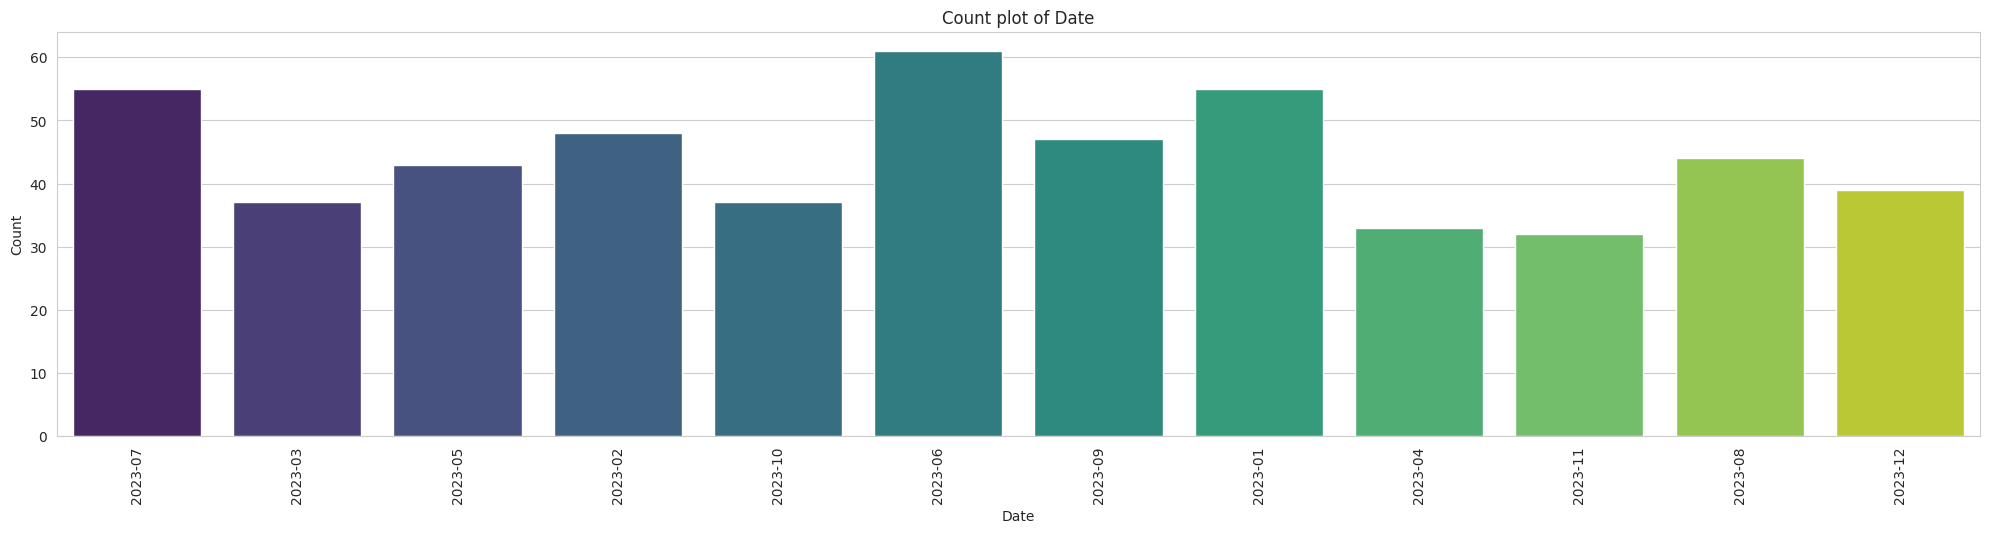

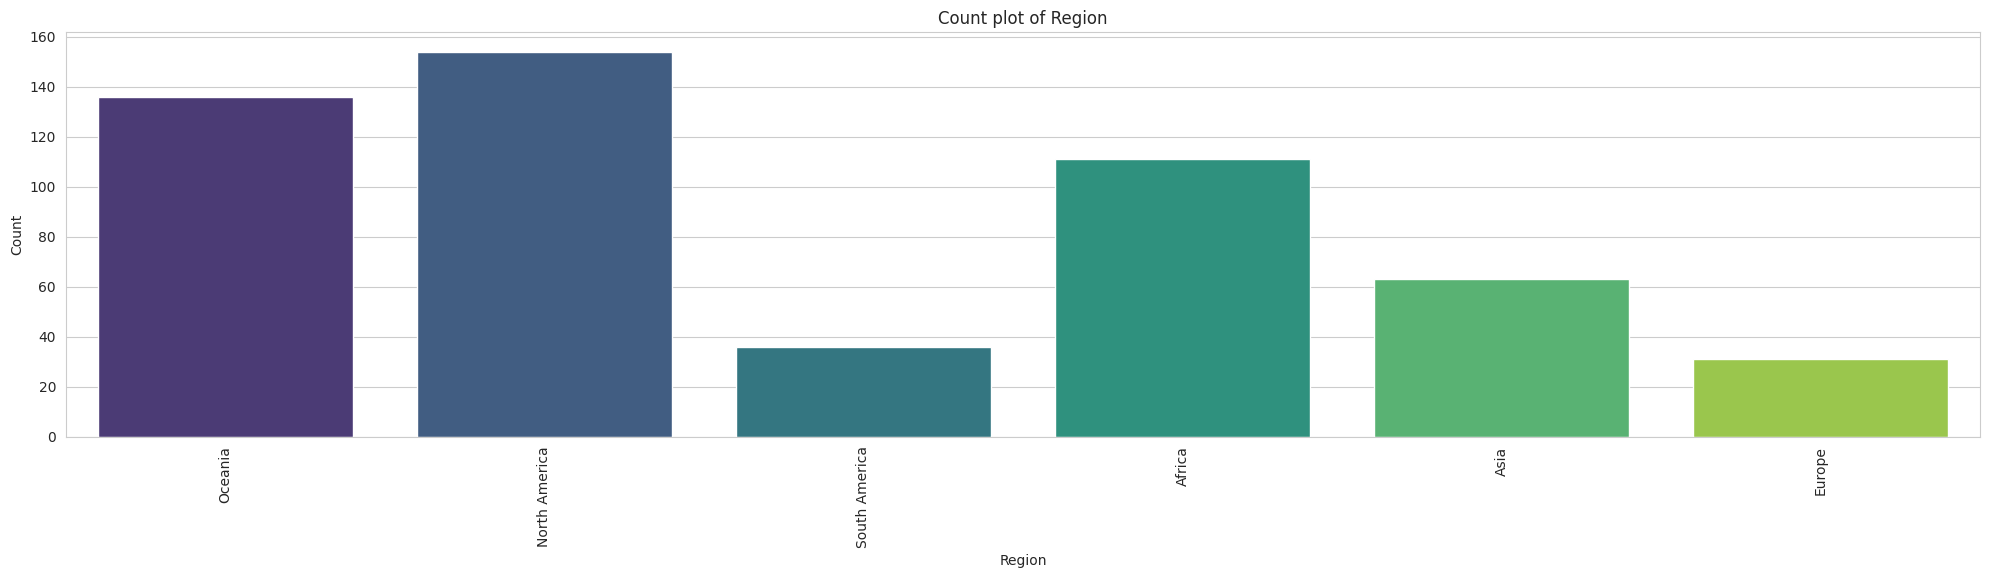

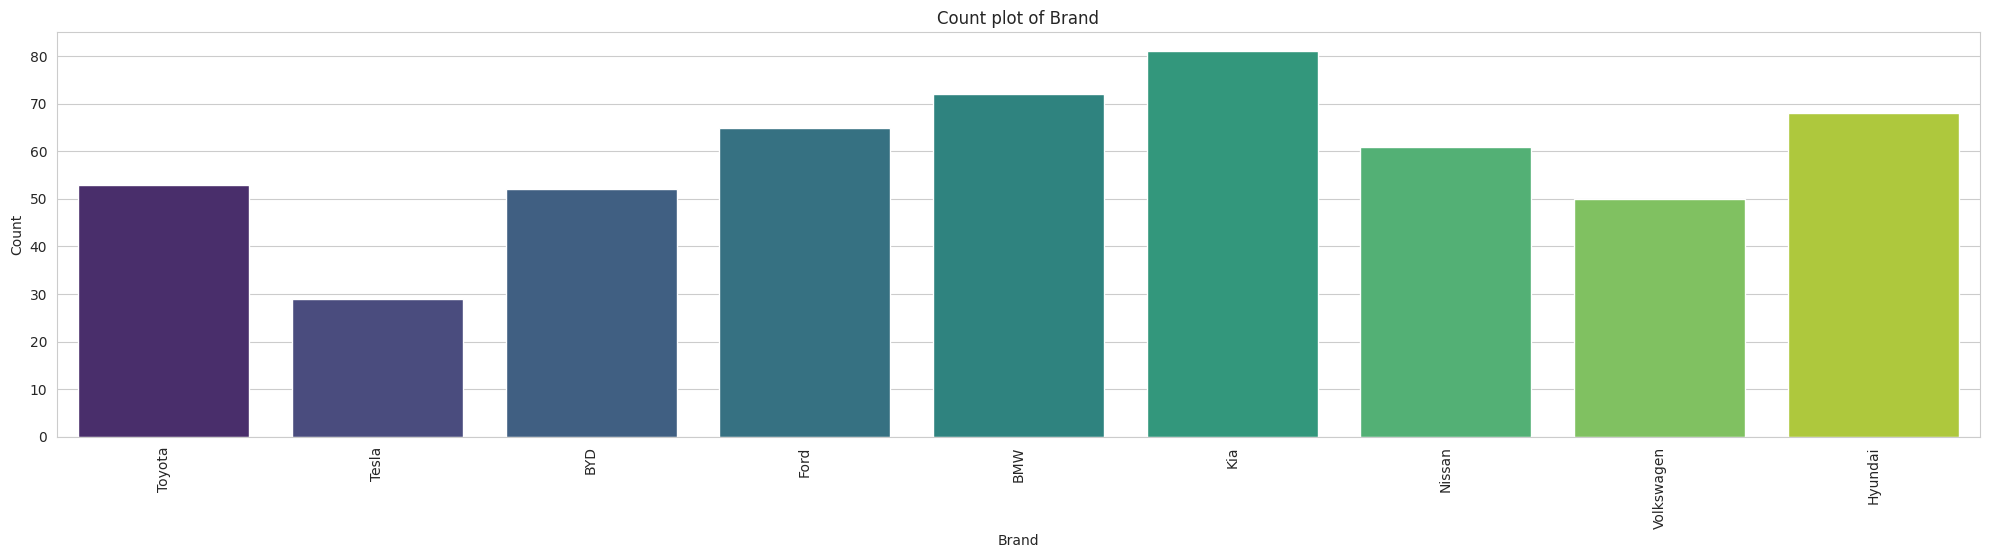

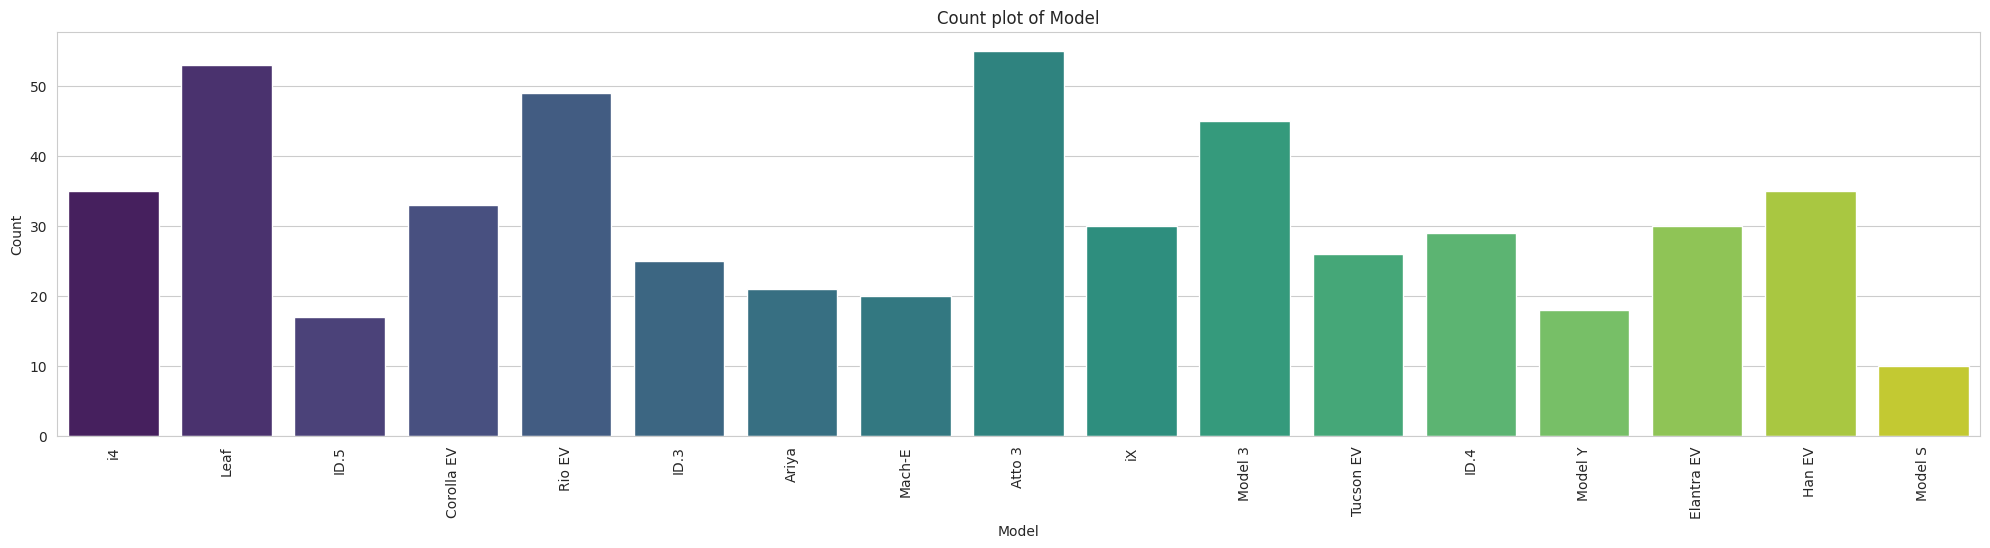

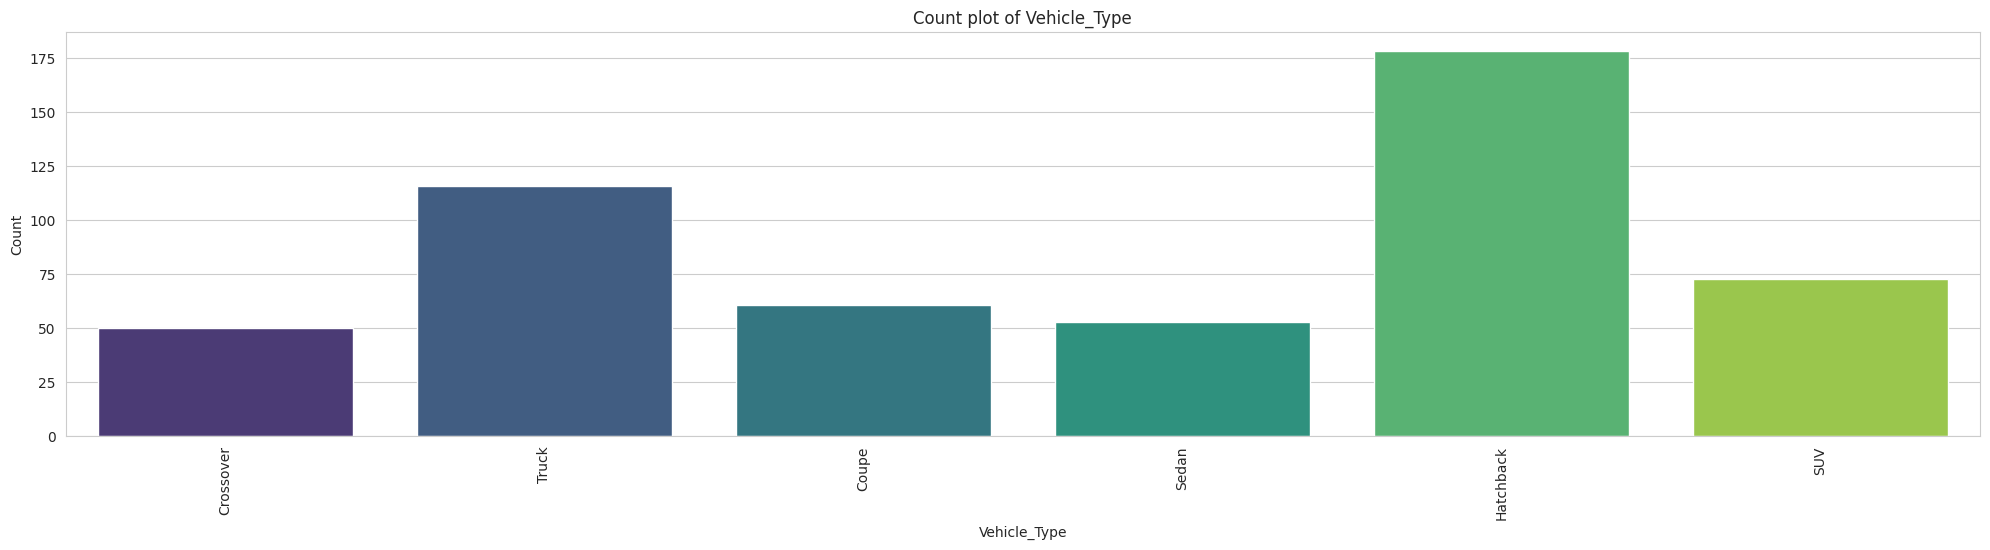

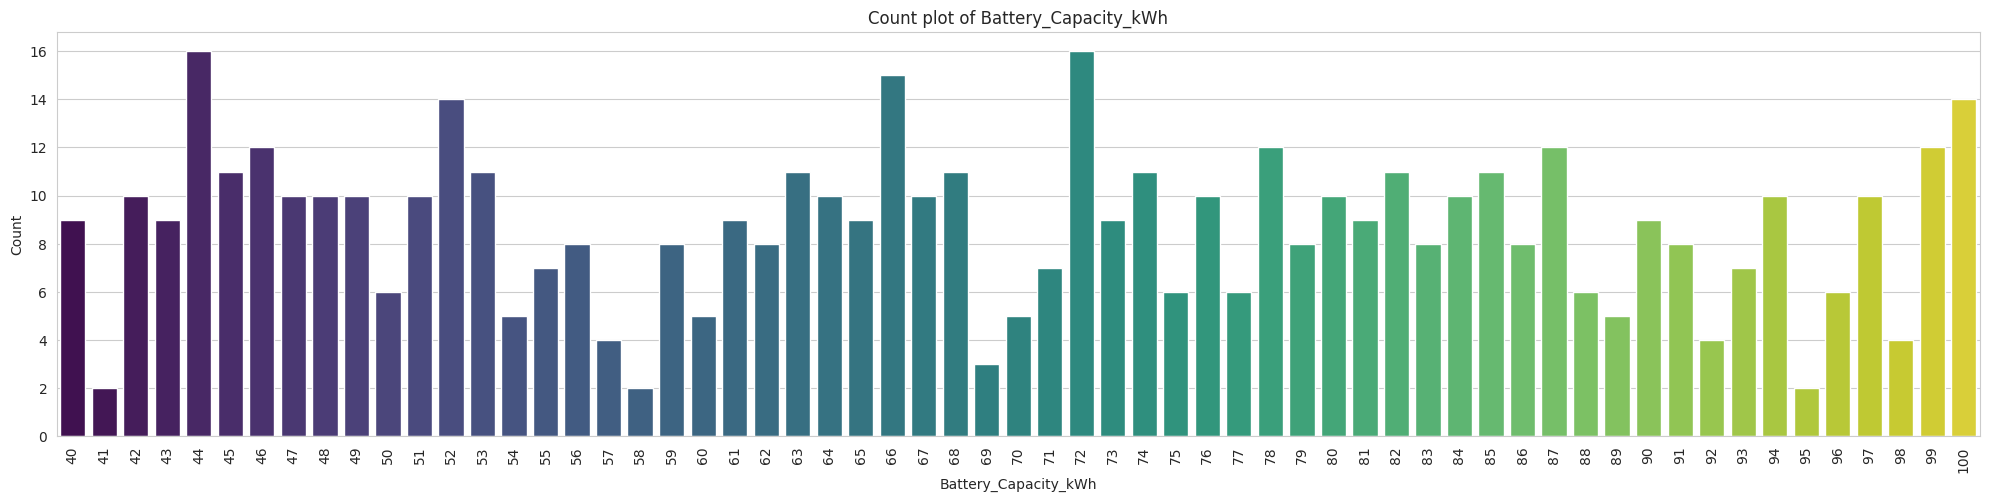

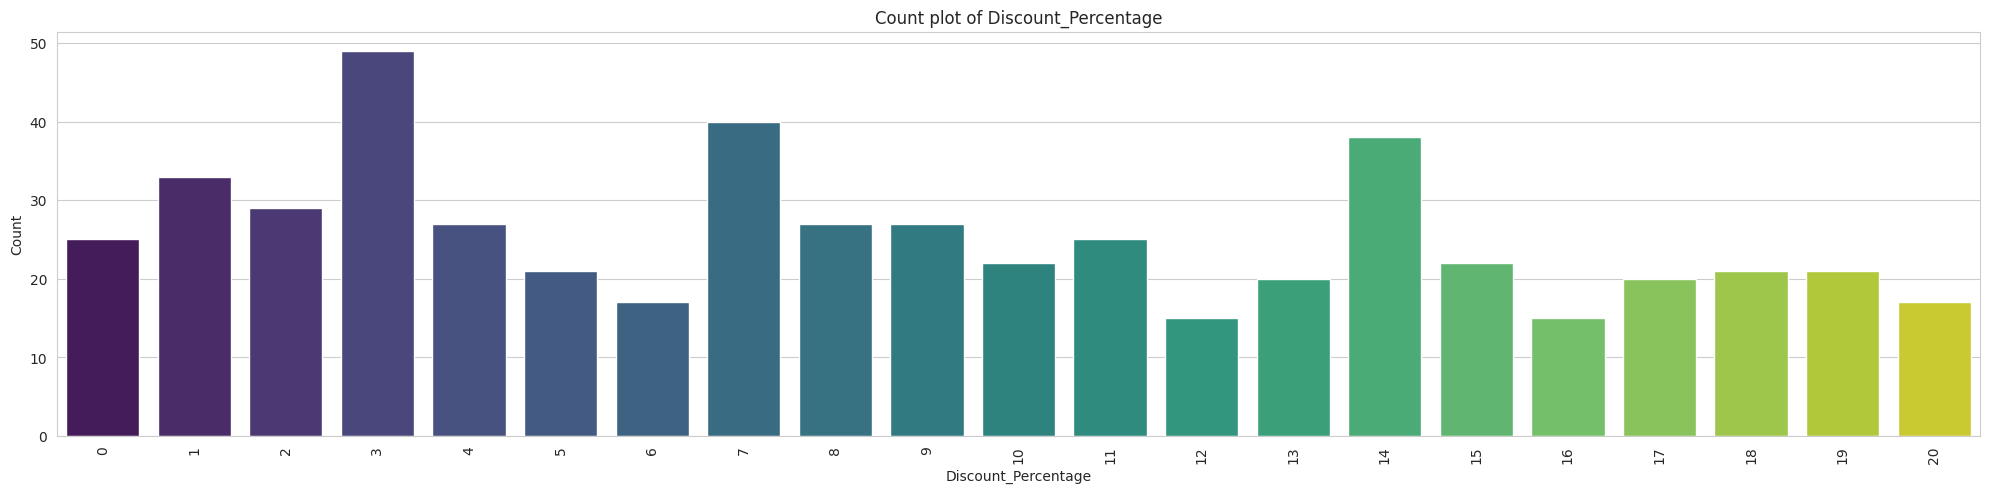

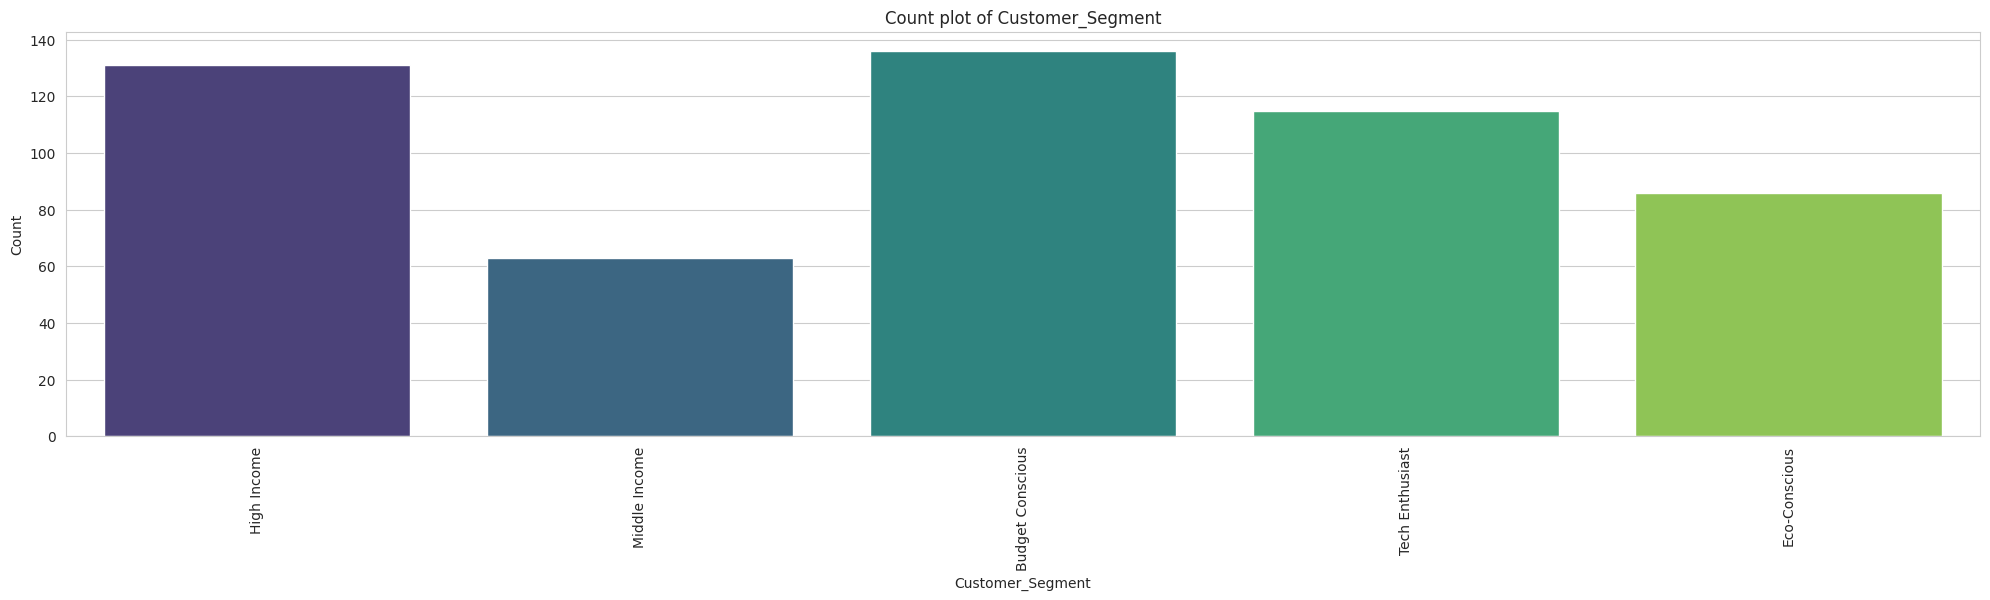

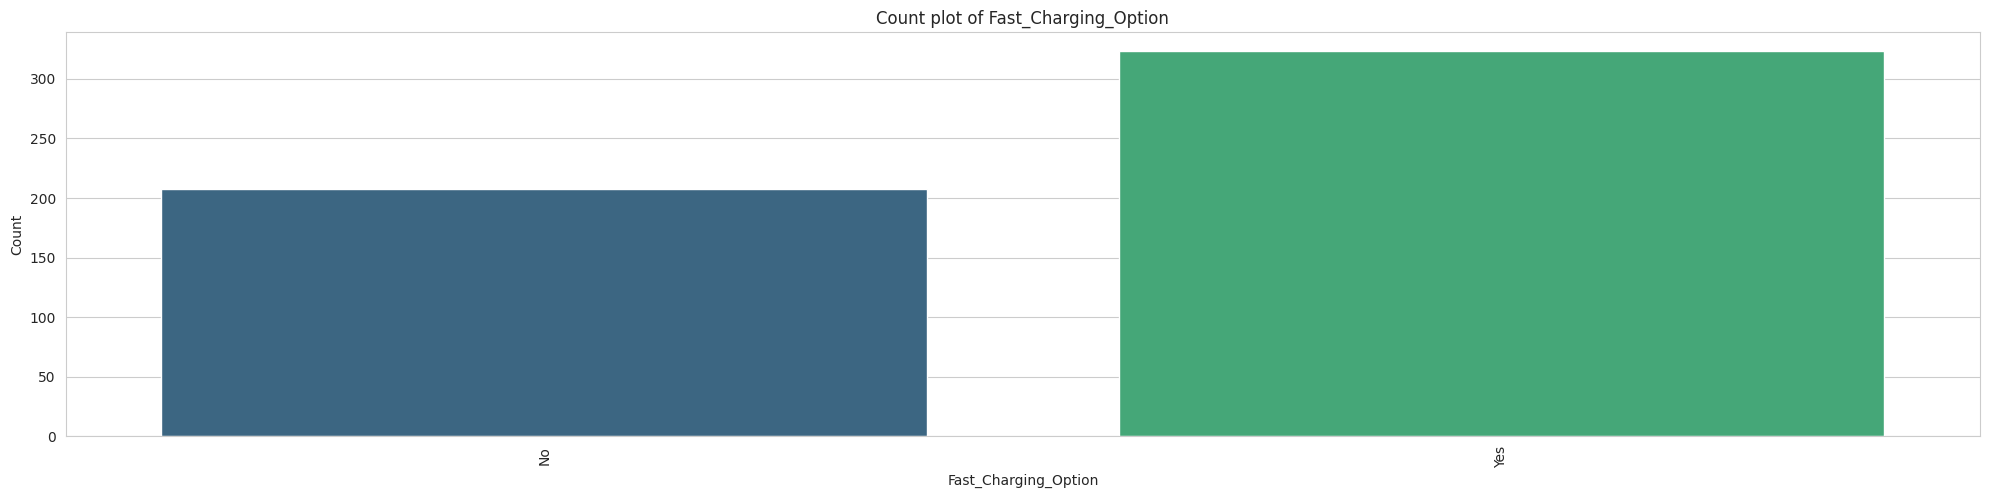

In [7]:
for features in train_col:
    if features in df_train.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data = df_train,palette = 'viridis')
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.show()

# Line plot

Text(0, 0.5, 'Units_Sold')

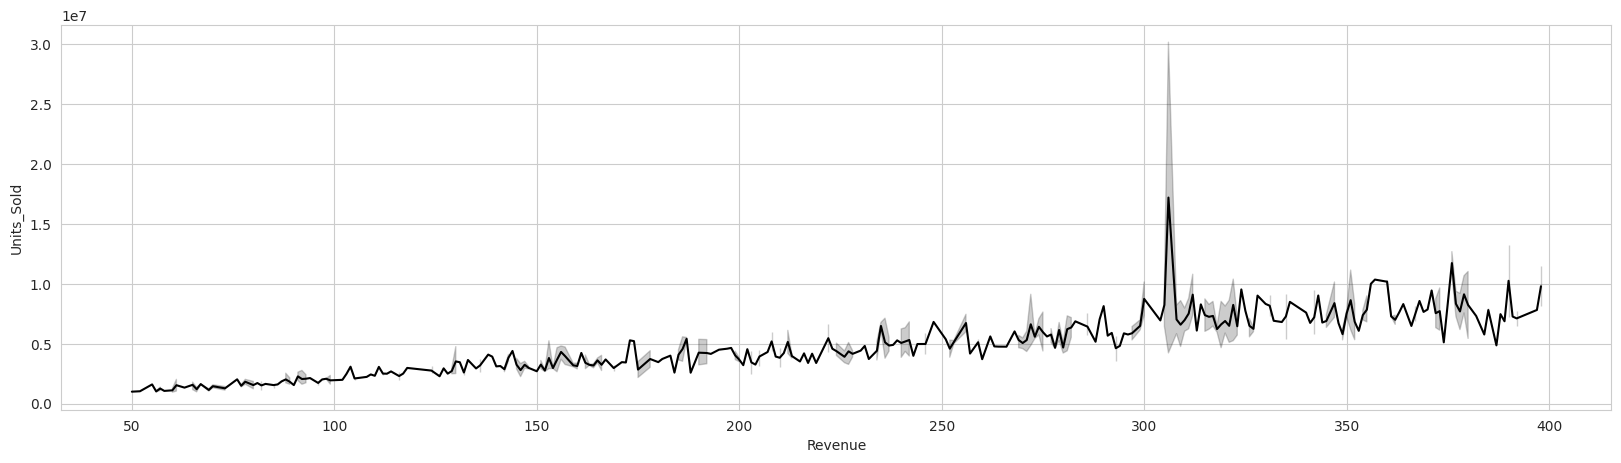

In [8]:
# 'Revenue'   'Units_Sold', 'Revenue'
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train,y='Revenue',x='Units_Sold',color = 'black')
plt.xlabel('Revenue')
plt.ylabel('Units_Sold')

# Bar plot 

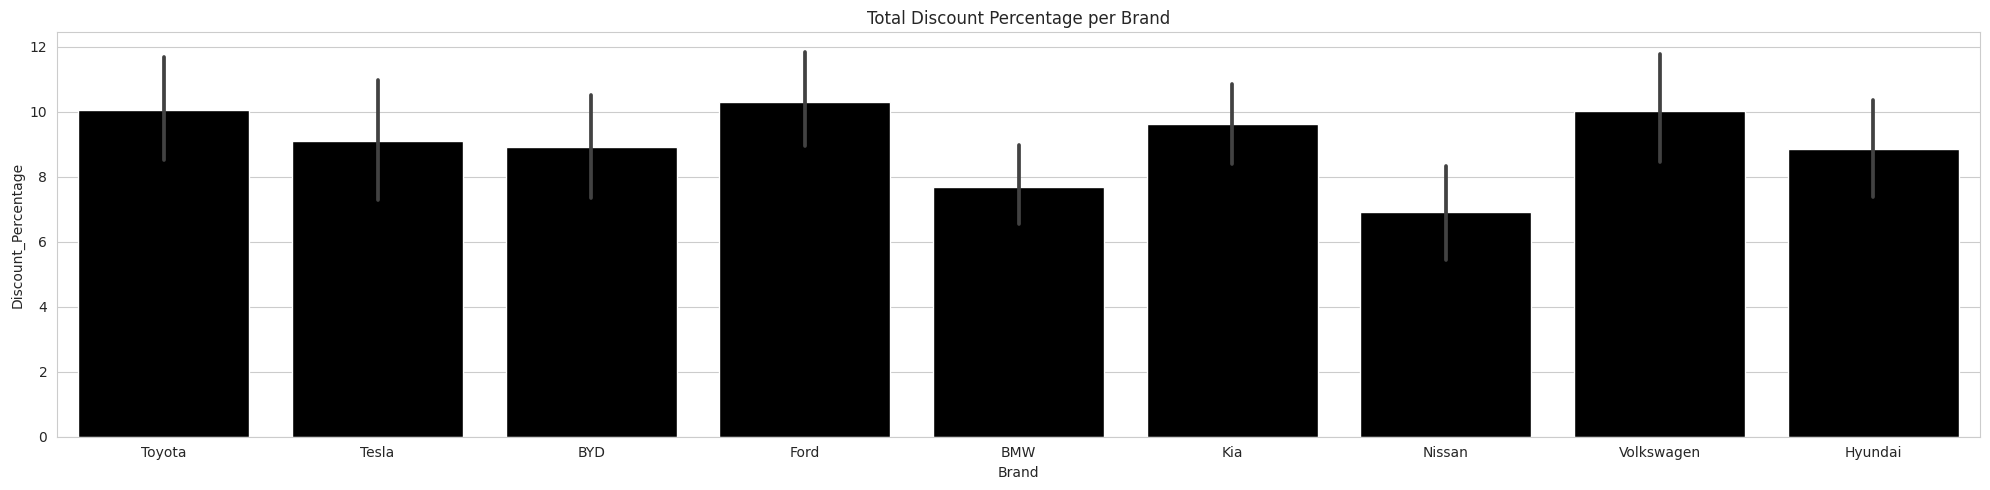

In [9]:

plt.figure(figsize=(20, 5))
sns.barplot(data=df_train, y='Discount_Percentage', x='Brand', color='black')
plt.xlabel('Brand')
plt.ylabel('Discount_Percentage')
plt.title('Total Discount Percentage per Brand')
plt.tight_layout()
plt.show()


# Correlation Matrix

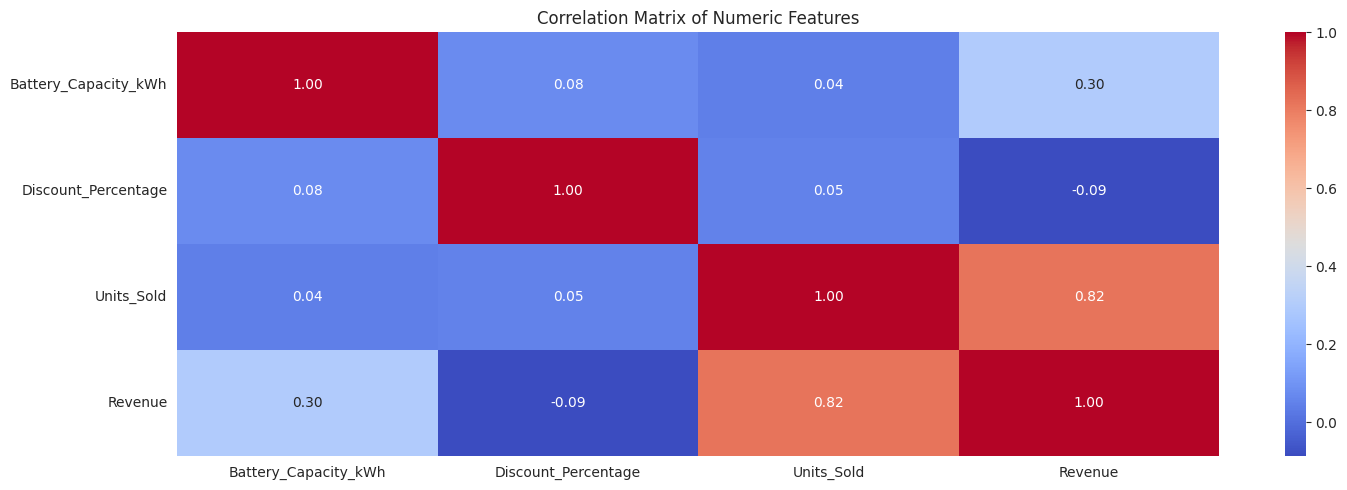

In [10]:
numeric_df = df_train.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=3:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

# Model Section

In [11]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import joblib

In [12]:
from sklearn.preprocessing import LabelEncoder
df_train.columns

lab_col = ['Region', 'Brand', 'Model', 'Vehicle_Type', 'Customer_Segment',
       'Fast_Charging_Option']

le = LabelEncoder()

for column in lab_col:
    df_train[column] = le.fit_transform(df_train[column])

In [13]:
df_train.columns

Index(['Date', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option', 'Units_Sold', 'Revenue'],
      dtype='object')

In [14]:
X = df_train.drop(columns=['Date','Units_Sold'])
y = df_train['Units_Sold']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
lr = XGBRegressor()

In [17]:
lr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred_lr = lr.predict(X_test)

In [19]:
r2 = r2_score(y_pred_lr,y_test)
r2

0.8648830739846931

In [20]:
models = {
    # "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [21]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [22]:

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

              Model  R2 Score        MSE     RMSE      MAE
4      RandomForest    0.9148   865.5879  29.4209  21.5955
6          AdaBoost    0.9138   875.5424  29.5896  23.1625
5  GradientBoosting    0.9124   889.5612  29.8255  22.2086
7        KNeighbors    0.8879  1139.2243  33.7524  24.6897
8           XGBoost    0.8841  1177.5152  34.3149  24.8302
3      DecisionTree    0.8076  1955.2897  44.2187  31.2710
2        ElasticNet    0.8014  2017.9563  44.9217  38.0535
1             Lasso    0.7999  2032.6537  45.0850  38.2777
0             Ridge    0.7972  2060.3258  45.3908  38.5813


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  531 non-null    object
 1   Region                531 non-null    int64 
 2   Brand                 531 non-null    int64 
 3   Model                 531 non-null    int64 
 4   Vehicle_Type          531 non-null    int64 
 5   Battery_Capacity_kWh  531 non-null    int64 
 6   Discount_Percentage   531 non-null    int64 
 7   Customer_Segment      531 non-null    int64 
 8   Fast_Charging_Option  531 non-null    int64 
 9   Units_Sold            531 non-null    int64 
 10  Revenue               531 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 45.8+ KB


# For Training dataset

In [24]:
df_train.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,2023-07,4,7,15,1,62,6,2,0,260,3699780
1,2023-03,4,7,8,5,70,19,2,1,347,7801424
2,2023-05,3,7,7,1,81,13,3,0,294,4813013
3,2023-02,4,6,2,5,73,4,2,1,281,7484912
4,2023-10,3,1,8,0,52,4,2,0,166,4025360


In [25]:
df_test = pd.read_csv('/kaggle/input/electric-vehicle-ev-sales-and-adoption/test.csv')
df_test.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,2023-04,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No
1,2023-10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes
2,2023-10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes
3,2023-02,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No
4,2023-10,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes


In [26]:
from sklearn.preprocessing import LabelEncoder

lab_col = ['Region', 'Brand', 'Model', 'Vehicle_Type', 'Customer_Segment',
       'Fast_Charging_Option']

le_test = LabelEncoder()

for column in lab_col:
    df_test[column] = le_test.fit_transform(df_test[column])

In [27]:
# Define your feature columns
feature_cols = ['Discount_Percentage','Vehicle_Type',
       'Battery_Capacity_kWh', 'Customer_Segment',
       'Fast_Charging_Option','Brand']

X_train = df_train[feature_cols]
y_train = df_train['Region'] 

X_test = df_test[feature_cols]
y_test = df_test['Region'] 


In [28]:
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}


In [29]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Optional: only do this if y_test is available
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)


              Model  R2 Score     MSE    RMSE     MAE
1             Lasso   -0.0084  2.9375  1.7139  1.5383
2        ElasticNet   -0.0084  2.9375  1.7139  1.5383
6          AdaBoost   -0.0163  2.9607  1.7207  1.5516
0             Ridge   -0.0178  2.9649  1.7219  1.5188
5  GradientBoosting   -0.2051  3.5107  1.8737  1.5916
4      RandomForest   -0.2105  3.5264  1.8779  1.6070
7        KNeighbors   -0.2608  3.6729  1.9165  1.6284
8           XGBoost   -0.4918  4.3457  2.0846  1.6962
3      DecisionTree   -0.9099  5.5636  2.3587  1.8255


# CONCLUSION:
> Better Featue Engineering required.